In [9]:
from datahandling import access_db
from tinydb import Query
from no_big_db_func import get_Ys
from model_analysis import translate_model_code
from matplotlib.pyplot import figure, xlabel, tight_layout
from pandas import DataFrame
from numpy import where

%matplotlib inline

Q = Query()

In [10]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.set_style('ticks', {'font.family': 'Cambria'})

In [11]:
sm_db = access_db(3, True)

In [12]:
Ys = get_Ys()

In [25]:
names = Ys.columns
    # names = [i for i in names if i in [u'rheomix final_deg_time_min']]

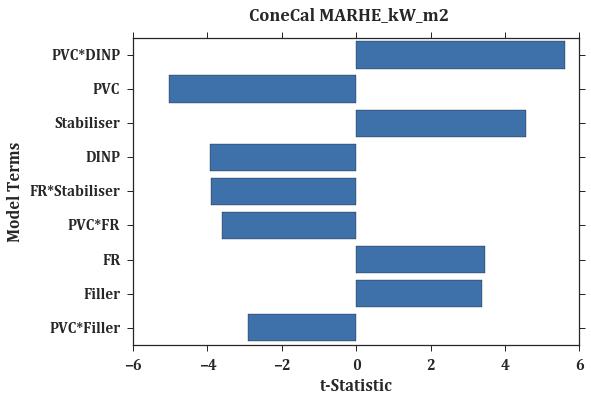

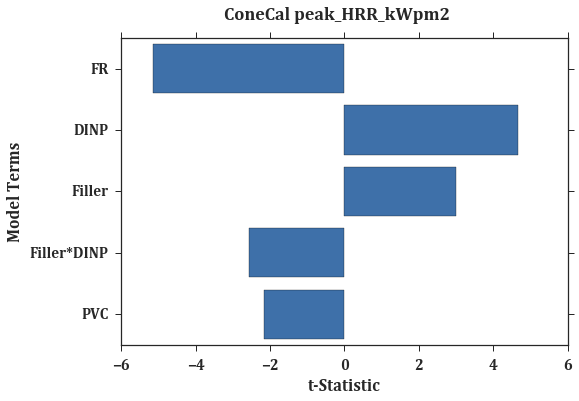

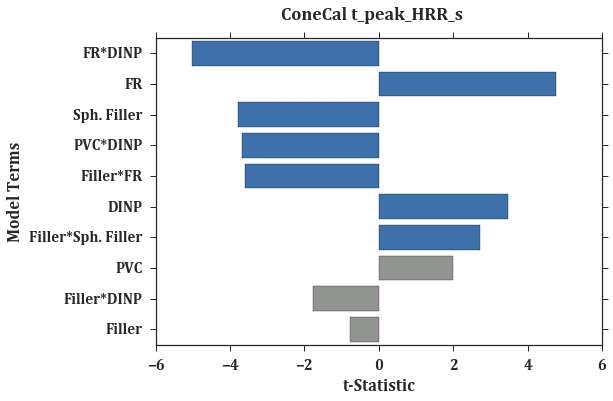

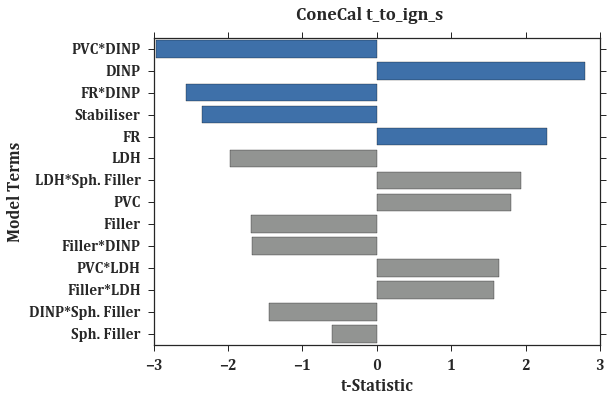

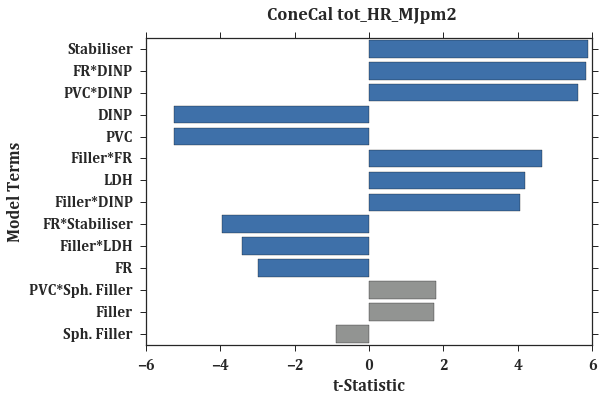

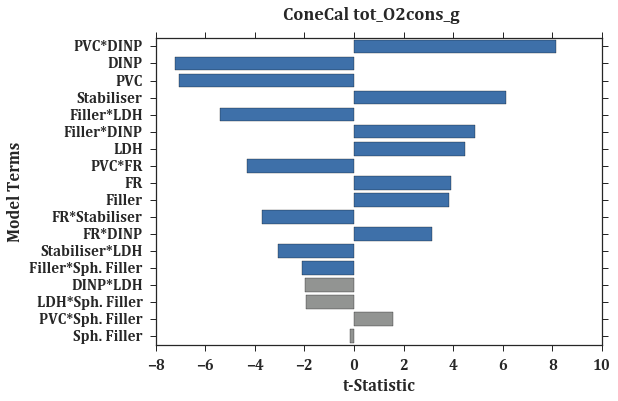

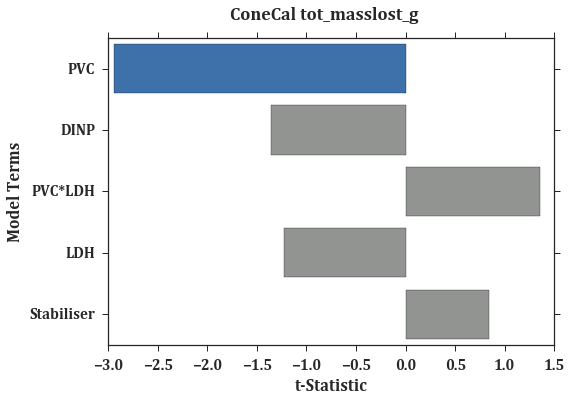

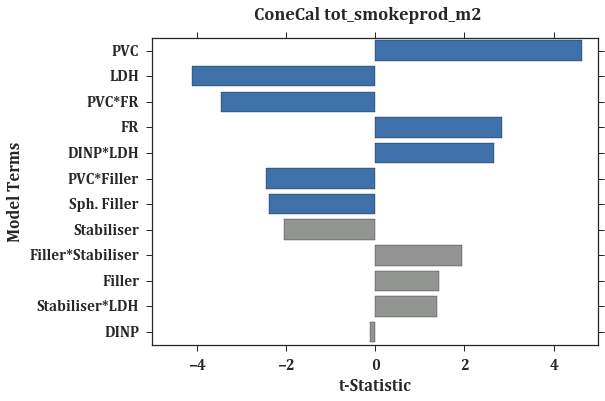

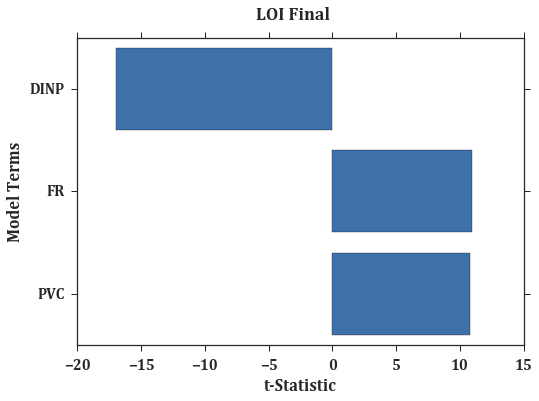

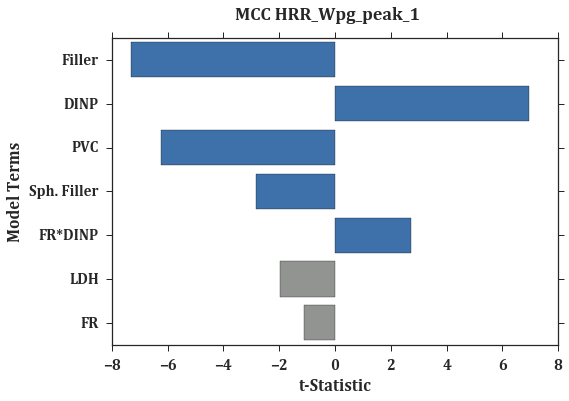

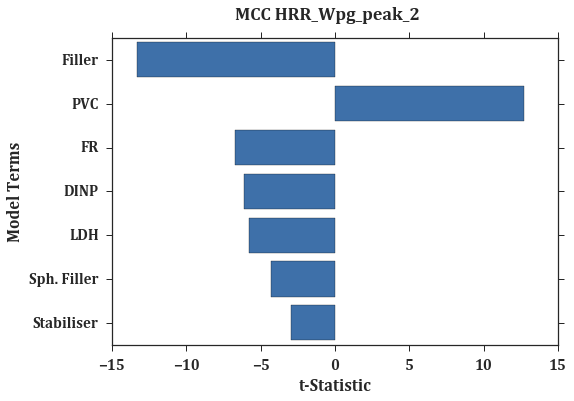

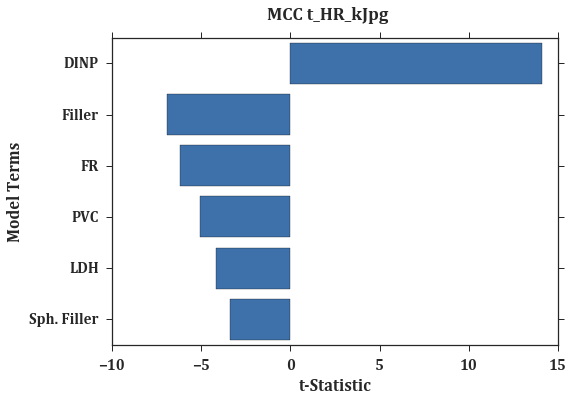

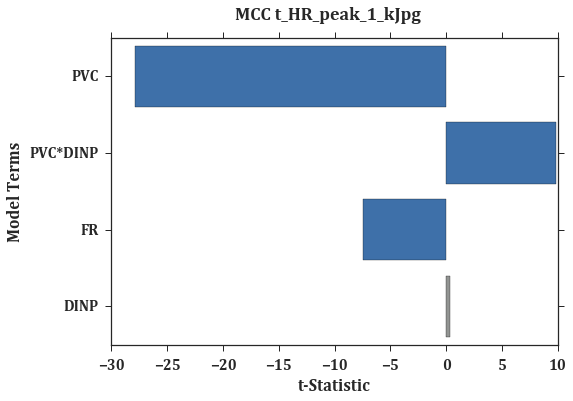

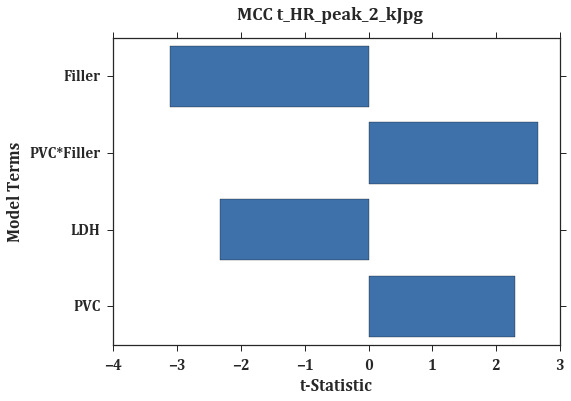

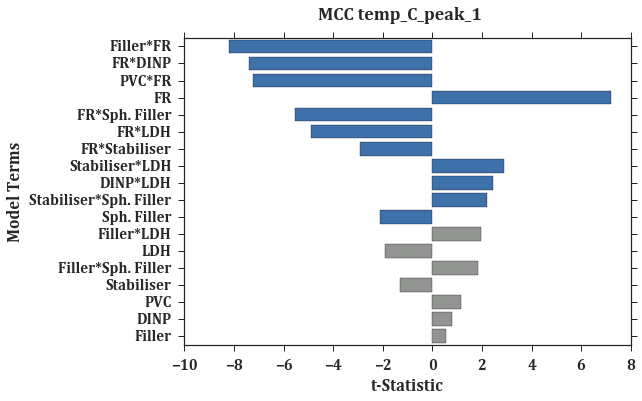

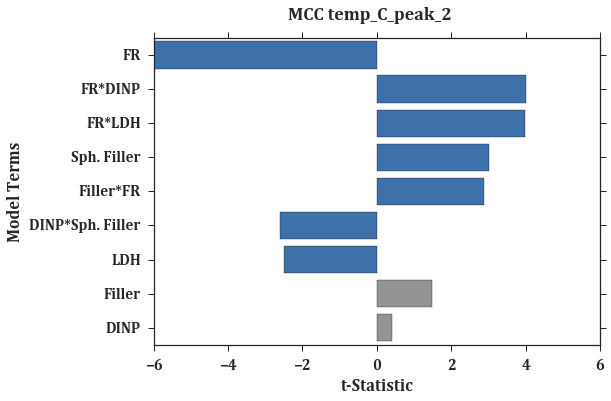

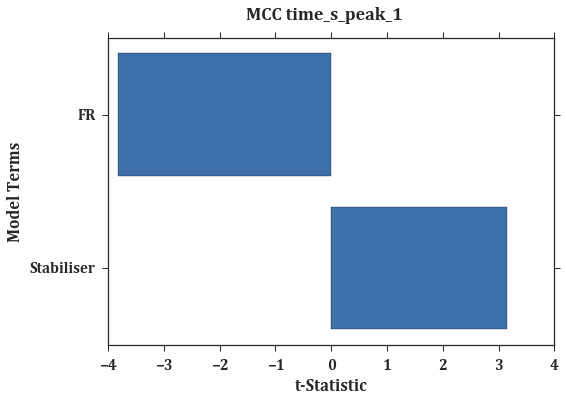

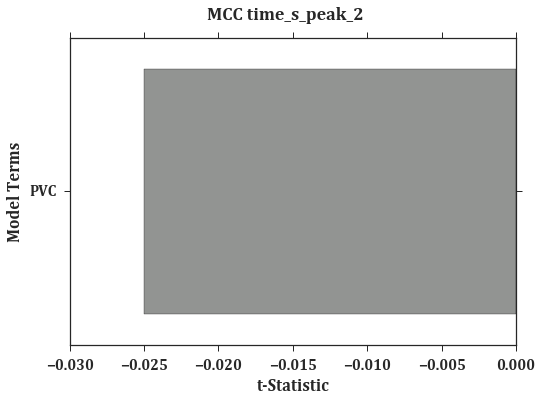

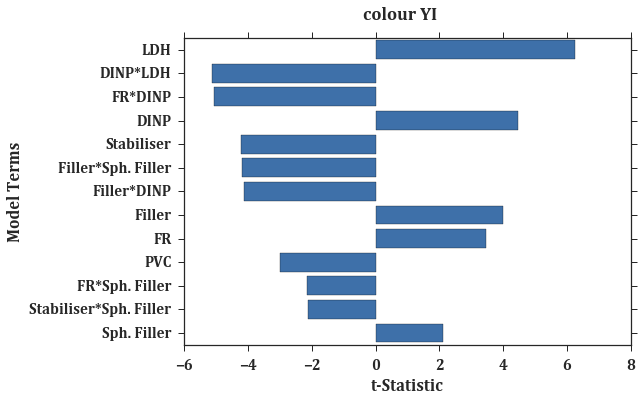

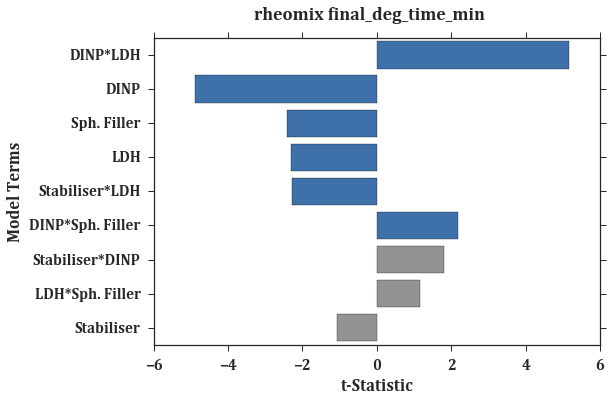

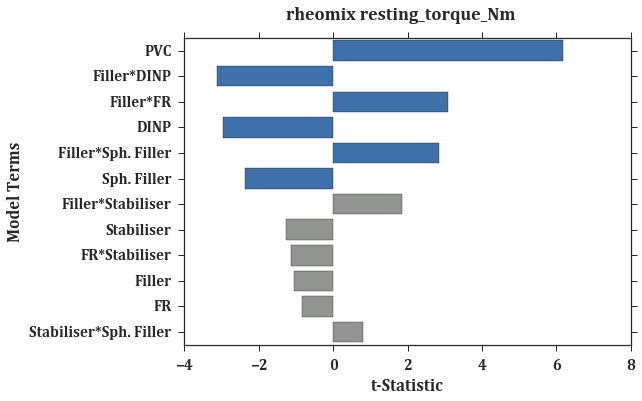

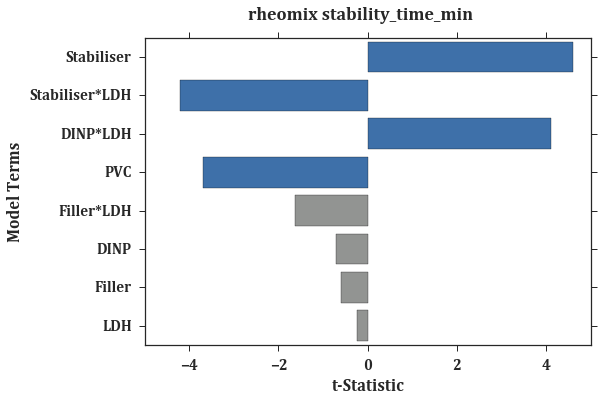

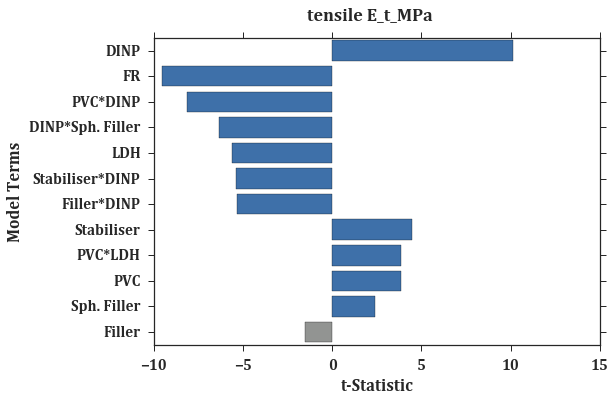

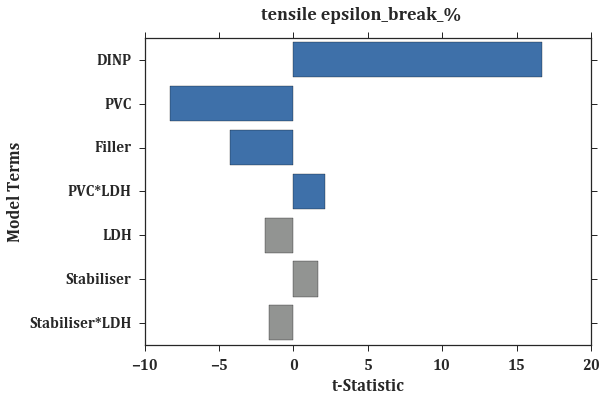

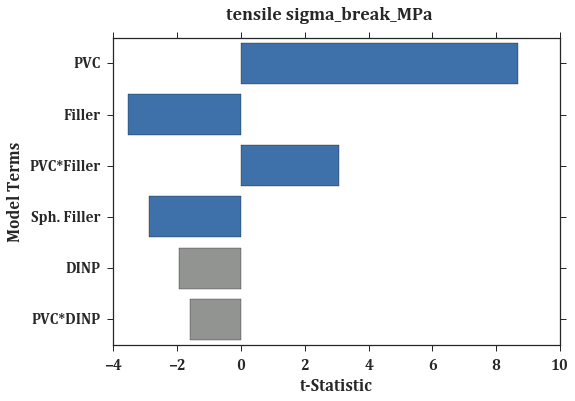

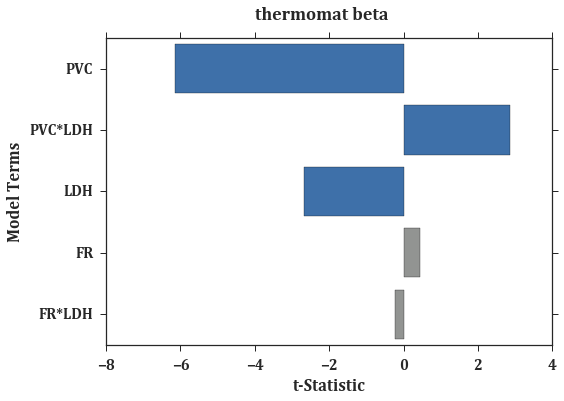

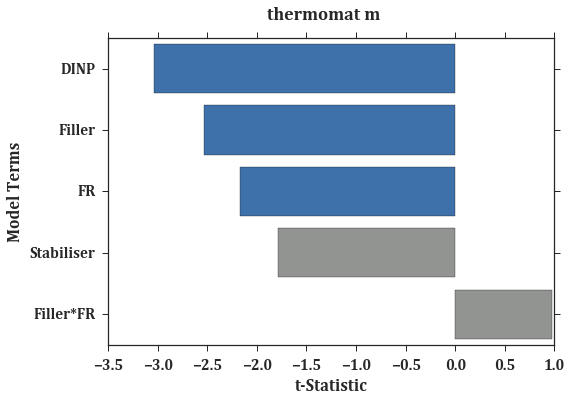

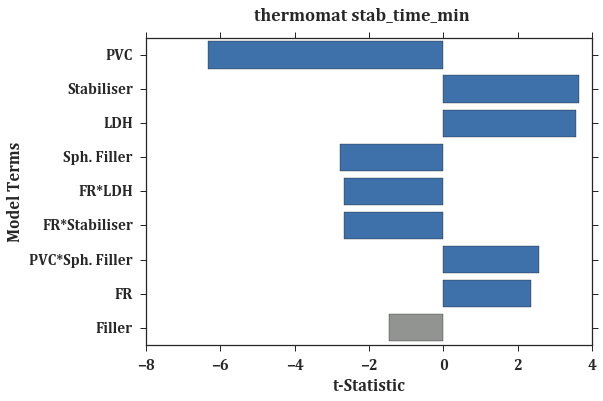

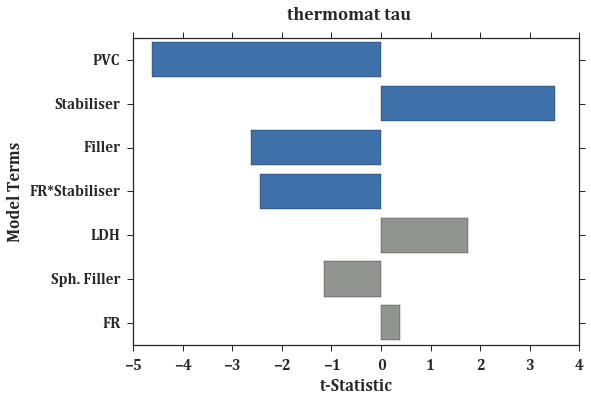

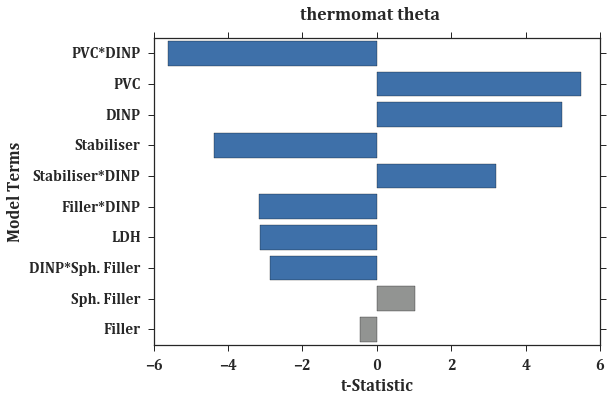

In [26]:
for column in names:
    equip, d_type = column.split(' ')
    
    info = sm_db.search((Q.equipment_name == equip) & (Q.data_type == d_type))
    mcode = info[0]['select_mcode']
    t_vals = info[0]['t_vals']
    p_vals = info[0]['p_vals']
    model_params = info[0]['model_params']
    
    trans_mc = translate_model_code(mcode)
    
    df = DataFrame([trans_mc, t_vals, p_vals, model_params],
                   index=['Model Terms', 't Statistic', 'p_statistic', 'model_params']).T
    
    sort_df = df.reindex(DataFrame(df['t Statistic'].abs()).sort_values('t Statistic', ascending=False).index)  
    
    colours = [sns.xkcd_rgb['medium blue'] if (x < 0.05) else sns.xkcd_rgb['grey'] for x in sort_df['p_statistic']]
    # maybe use 'dark grey' instead of 'medium blue' to make it better in greyscale. 
    
    fig1 = figure()
    sns.barplot(x='t Statistic', y='Model Terms', data=sort_df, palette=colours)
    xlabel('t-Statistic')
#     tight_layout()
    
#     fig1.savefig('Model_terms_final_deg_time.pdf')
    fig1.suptitle(column)
    
#     fig2 = figure()
#     sns.barplot(x='model_params', y='p_names', data=sort_df, palette=colours)
#     fig2.suptitle(column)

In [16]:
df

,Model Terms,t Statistic,p_statistic,model_params
0,Stabiliser,-1.07439,0.289605,-6.46429
1,DINP,-4.88778,1.99424e-05,-4.62348
2,LDH,-2.30305,0.0269983,-12.3491
3,Sph. Filler,-2.40197,0.0214428,-8.6265
4,Stabiliser*DINP,1.81214,0.0780864,60.5096
5,Stabiliser*LDH,-2.29067,0.0277781,-206.041
6,DINP*LDH,5.16547,8.4508e-06,114.928
7,DINP*Sph. Filler,2.18052,0.0356528,39.6655
8,LDH*Sph. Filler,1.15198,0.256717,49.9637
